<a href="https://colab.research.google.com/github/Nelsontdl/Phase-4/blob/main/phase_4_TECNICA_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iniciamos configurando el entorno e importando librerias**

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Ahora montamos Google Drive para poder acceder a los archivos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ahora cargamos el archivo

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MAESTRIA IOT/Phase 4/iotsim-hydraulic-system-2.csv')


Hacemos una limpieza de la base de datos en donde eliminamos campos como direcciones MAC/IP, las cuales no aportan valores predictivos directos y que pueden generar "ruido", tambien convertimos las clases en **(Bening y Malicious)** para que el modelo pueda procesarlas.

In [ ]:
df = df.drop(columns=['eth.src', 'eth.dst', 'ip.src', 'ip.dst'])
df['label'] = df['label'].apply(lambda x: 'Malicious' if x != 'Benign' else 'Benign')
df = pd.get_dummies(df)

Ahora separamos los datos para evaluar el modelo con datos que no se han visto antes, simulando un entorno real.

In [ ]:
if 'label_Malicious' not in df.columns:
    df['label_Malicious'] = 0

X = df.drop('label_Benign', axis=1)
y = df['label_Malicious']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ahora instalamos la libreria faltante que contiene SMOTE y otras técnicas para tratar desequilibrios de clases.

In [ ]:
!pip install imbalanced-learn

Importamos SMOTE y dividimos los datos de entrenmiento y prueba

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Aplicamos SMOTE para generar nuevos ejemplos sintéticos de la clase minoritaria (maliciosa) en X_train


In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Verificamos el balance de clases

In [ ]:
print("Antes de SMOTE:", np.bincount(y_train))
print("Después de SMOTE:", np.bincount(y_train_resampled))

Antes de SMOTE: [1985   15]
Después de SMOTE: [1985 1985]


Entrenamos el modelo con datos balanceados

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

Ahora evaluamos

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       497
        True       0.00      0.00      0.00         4

    accuracy                           0.99       501
   macro avg       0.50      0.50      0.50       501
weighted avg       0.98      0.99      0.99       501



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Ahora procedemos a visualizar los resultados

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       497
        True       0.00      0.00      0.00         4

    accuracy                           0.99       501
   macro avg       0.50      0.50      0.50       501
weighted avg       0.98      0.99      0.99       501



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


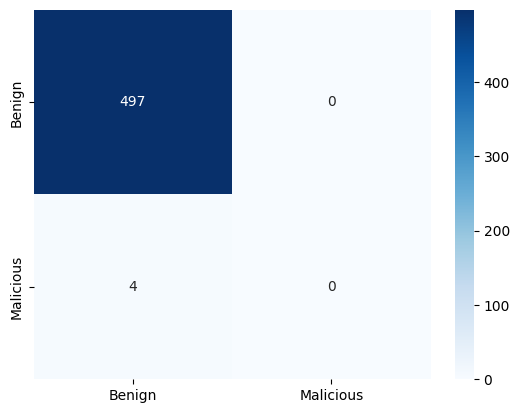

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malicious'], yticklabels=['Benign','Malicious'])
print(classification_report(y_test, y_pred))

Podemos visuzalizar la matriz de confusion que indica los verdaderos positivos(deteccion correcta de ataques), falsos positivos (trafico normal clasificado como ataque) y falsos negativos (ataques no detectados)